### This is the third Part of Char level Modeling and will discuss Neural Model for same
### Complete First and Second Part before starting this
By Naveen Aggarwal

In [1]:
import torch
import torch.nn.functional as F  # For Torch.generator
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
words=open("names.txt", 'r').read().splitlines()

In [3]:
chars= list('.abcdefghijklmnopqrstuvwxyz') # This may be changed to chars=sorted(list(set(''.join(words))))
stoi={s:i for i,s in enumerate(chars)}
#stoi

# Lets also create itos, we will use later
itos={i:s for i,s in enumerate (chars)}
#itos

In [52]:
# Create a dataset
block_size=3
X,Y =[],[]
for w in words[:5]:
    print(w)
    context=[0]*block_size
    #print(context)
    for ch in w +'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context=context[1:]+[ix]
        #print context to get better understanding
        #print(context)
        
X=torch.tensor(X)
Y=torch.tensor(Y)
# Change block_size to higher value to get better understanding

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [53]:
# Check X, Y
print(X.shape, Y.shape, X.dtype, Y.dtype)
print(X)
print(Y)

torch.Size([32, 3]) torch.Size([32]) torch.int64 torch.int64
tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])
tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])


#### Now Lets build an Input vector for NN
#### We will map X to a two dimensional random vector

In [54]:
C=torch.randn((27,2))
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

#### Now lets prepare hidden layer

In [55]:
# Shape depends upon us, We are mapping all the words into two columns and considering block_size to 3
# Later on we will have to generalize it
W1=torch.randn(6,100)
b1=torch.randn(100)

#### Now Shape of emb is [32, 3, 2] . To multiply with W, we need to resize it to [16,6] by using the resize operation. In torch, it is view operation.

In [56]:
# Rather than giving emb.view (32,6)--> We can write emb.view(-1,6). This will allow to pick default shape
h=torch.tanh(emb.view(-1, 6)@W1 +b1)
h.shape

torch.Size([32, 100])

#### Lets create last layer
#### In this, it will take 100 neurons from hidden layer and then output 27 classes

In [57]:
W2=torch.randn(100,27)
b2=torch.randn(27)

In [58]:
logits=h@W2+b2
logits.shape

torch.Size([32, 27])

In [59]:
# Calculate Probs (softmax)
counts=logits.exp()
prob=counts/counts.sum()
print(prob.shape)
prob.sum()

torch.Size([32, 27])


tensor(1.)

#### Now Lets define the loss function

In [60]:
loss=-prob[torch.arange(32),Y].log().mean()
loss

tensor(24.5345)

In [61]:
# Now Instead of using code in above two blocks
#counts=logits.exp()
#prob=counts/counts.sum()
#loss=-prob[torch.arange(16),Y].log().mean()

# We can simply use cross entropy function
F.cross_entropy(logits,Y)
loss

tensor(24.5345)

#### Now Lets Compile all discussed above in few cells

In [97]:
# Define all parameters
g=torch.Generator().manual_seed(9814865455)
C=torch.randn((27,2), generator=g)
W1=torch.randn((6,100), generator=g)
b1=torch.randn((100), generator=g)
W2=torch.randn((100,27), generator=g)
b2=torch.randn((27), generator=g)
parameters=[C,W1,b1, W2, b2]
sum(p.nelement() for p in parameters)

3481

In [71]:
#Initialize P
for p in parameters:
    p.requires_grad=True
#Loop it    
for _ in range (10):
    # Forward Pass

    emb=C[X]
    h=torch.tanh(emb.view(-1, 6)@W1 +b1)
    logits=h @ W2 + b2

    loss=F.cross_entropy(logits,Y)
    print(loss.item())

    # Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    lr=0.1
    for p in parameters:
        p.data+=-lr * p.grad


3.7152533531188965
3.701462745666504
3.687932252883911
3.6746551990509033
3.661623954772949
3.648832321166992
3.6362721920013428
3.6239378452301025
3.6118221282958984
3.599918842315674


#### Now we have understood, lets do it for full dataset

In [68]:
# Create a dataset
block_size=3
X,Y =[],[]
for w in words:
    context=[0]*block_size
    for ch in w +'.':
        ix=stoi[ch]
        X.append(context)
        Y.append(ix)
        context=context[1:]+[ix]
        
        
X=torch.tensor(X)
Y=torch.tensor(Y)
print(X.shape,Y.shape)

torch.Size([228146, 3]) torch.Size([228146])


#### Now We can run generate parameters and Forward backward pass blocks again

### Now lets create a mininbatch and run the same code again

In [77]:
#Initialize P
for p in parameters:
    p.requires_grad=True

#Loop it    
for _ in range (100):
    # Create a Minibatch to run it faster
    ix=torch.randint(0,X.shape[0],(32,))
    # Forward Pass

    emb=C[X[ix]]
    h=torch.tanh(emb.view(-1, 6)@W1 +b1)
    logits=h @ W2 + b2

    loss=F.cross_entropy(logits,Y[ix])
    #print(loss.item())

    # Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    lr=0.1
    for p in parameters:
        p.data+=-lr * p.grad
#final Loss Value
print(loss.item())

2.648634910583496


### How to Find which learning rate is good. Lets create a list of 100 learning rates varying from -000.1 to -1

In [87]:
lre=torch.linspace(-3, 0, 1000)
lrs=10**lre

#### Now We will run the same code again, But store lr and loss for each iteration. So that we can plot to check best learning rate

In [98]:
# Before Running Initialize all paramters again
lri=[]
lossi=[]
#Initialize P
for p in parameters:
    p.requires_grad=True

for i in range (1000):
    # Create a Minibatch to run it faster
    ix=torch.randint(0,X.shape[0],(32,))
    # Forward Pass

    emb=C[X[ix]]
    h=torch.tanh(emb.view(-1, 6)@W1 +b1)
    logits=h @ W2 + b2

    loss=F.cross_entropy(logits,Y[ix])
    #print(loss.item())

    # Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    lr=lrs[i]
    for p in parameters:
        p.data+=-lr * p.grad
    #final Loss Value
    lri.append(lre[i])
    lossi.append(loss.item())

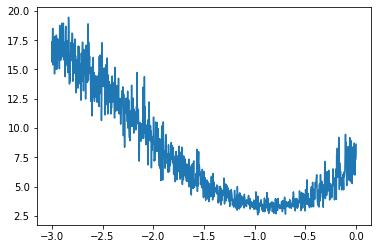

In [99]:
plt.plot(lri, lossi)

#### So from above it is clear that best learning rate is around 10^-1

#### Now to check the performance of the model, First Create training set, dev set and test set

In [100]:
# Create a dataset
def build_dataset(words):
    
    block_size=3
    X,Y =[],[]
    for w in words:
        context=[0]*block_size
        for ch in w +'.':
            ix=stoi[ch]
            X.append(context)
            Y.append(ix)
            context=context[1:]+[ix]
        
        
    X=torch.tensor(X)
    Y=torch.tensor(Y)
    print(X.shape,Y.shape)
    return X, Y

import random 
random.seed=42
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))
Xtr, Ytr=build_dataset(words[:n1])
Xdev, Ydev=build_dataset(words[n1:n2])
Xtest, Ytest=build_dataset(words[n2:])

torch.Size([182416, 3]) torch.Size([182416])
torch.Size([22792, 3]) torch.Size([22792])
torch.Size([22938, 3]) torch.Size([22938])


In [110]:
# I have created a function to run it again and again
def initialize(dimension, h_neurons):
    # Define all parameters
    g=torch.Generator().manual_seed(9814865455)
    C=torch.randn((27,dimension), generator=g)
    W1=torch.randn((dimension*3,h_neurons), generator=g)
    b1=torch.randn((h_neurons), generator=g)
    W2=torch.randn((h_neurons,27), generator=g)
    b2=torch.randn((27), generator=g)
    parameters=[C,W1,b1, W2, b2]
    sum(p.nelement() for p in parameters)

In [111]:
#This we will run again for each new experiment
initialize(2,100)
#Initialize P
for p in parameters:
    p.requires_grad=True


In [135]:
lri=[]
lossi=[]
stepi=[]

In [141]:
# same Code as above
for i in range (200000):
    # Create a Minibatch to run it faster
    ix=torch.randint(0,Xtr.shape[0],(32,))
    # Forward Pass

    emb=C[Xtr[ix]]
    h=torch.tanh(emb.view(-1, 6)@W1 +b1)
    logits=h @ W2 + b2

    loss=F.cross_entropy(logits,Ytr[ix])
    #print(loss.item())

    # Backward Pass
    for p in parameters:
        p.grad=None
    loss.backward()

    #update
    # Change the learning rate after 10000 steps
    lr=0.1 if i <10000 else 0.01
    for p in parameters:
        p.data+=-lr * p.grad
    #final Loss Value
    #lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

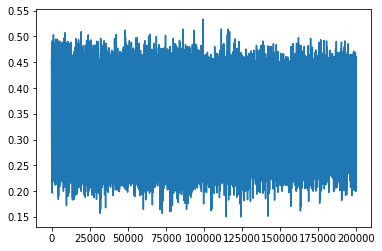

In [142]:
plt.plot(stepi, lossi)

In [143]:
# Calculate Training Loss
emb=C[Xtr]
h=torch.tanh(emb.view(-1, 6)@W1 +b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,Ytr)
print(loss.item())

2.227027177810669


In [144]:
# Calculate Dev Loss

emb=C[Xdev]
h=torch.tanh(emb.view(-1, 6)@W1 +b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,Ydev)
print(loss.item())

2.227346181869507


### Since Training and Development loss are nearly equal, so there is no overfitting. But we can improve the model By changing the dimesnions  and Hidden Layer Neurons

In [117]:
# Lets Initialize again
#This we will run again for each new experiment
initialize(10,300)
#Initialize P
for p in parameters:
    p.requires_grad=True

#### Run the above Cells of training again for multiple times (multiple epochs) and then check result on Test Set

In [140]:
# Calculate Dev Loss

emb=C[Xtest]
h=torch.tanh(emb.view(-1, 6)@W1 +b1)
logits=h @ W2 + b2
loss=F.cross_entropy(logits,Ytest)
print(loss.item())

2.2553932666778564


In [147]:
g=torch.Generator().manual_seed(9814865455+10)
for _ in range(20):
    out=[]
    context=[0]*block_size
    while True:
        emb=C[torch.tensor([context])]
        h=torch.tanh(emb.view(1, -1)@W1 +b1)
        logits=h @ W2 + b2
        probs=F.softmax(logits, dim=1)
        ix=torch.multinomial(probs, num_samples=1, generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i] for i in out))
        

kimendentison.
liora.
divonilyn.
zorkongelen.
shiav.
gora.
kalipkis.
betabricterleine.
brich.
suuttequan.
neim.
marie.
meigayzel.
aghib.
dylle.
makeriyah.
derleyah.
jysyn.
kra.
rige.
